In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The Economic Guide To Picking A College Major

This notebook is inspired by ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/) by FiveThirtyEight. 

## Part 1: Data Cleaning

### Import Data
The dataset is a data extract from [IPUMS USA](https://usa.ipums.org/usa/) for 2019 ACS and 2009 ACS.  IPUMS USA collects, preserves and harmonizes U.S. census microdata and provides easy access to this data with enhanced documentation. Data includes decennial censuses from 1790 to 2010 and American Community Surveys (ACS) from 2000 to the present.

In [2]:
ipsum_raw = pd.read_csv("../data/college-majors-ipums-acs.zip")
ipsum_raw

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,OCC,INCTOT,INCWAGE,INCWAGE_CPIU_2010
0,2009,200901,3,125,42.0,2009000000031,260001,1,1,44.0,...,0,0,0,0,1,10,5310,36800,27100,27545.0
1,2009,200901,3,125,42.0,2009000000031,260001,1,2,42.0,...,0,0,0,0,1,10,6200,54600,22100,22463.0
2,2009,200901,7,341,170.0,2009000000071,70001,1,1,170.0,...,0,0,0,0,2,20,5620,820,820,833.0
3,2009,200901,9,396,82.0,2009000000091,140001,1,1,82.0,...,0,0,0,0,1,10,3740,45000,45000,45738.0
4,2009,200901,9,396,82.0,2009000000091,140001,1,2,104.0,...,0,0,0,0,3,30,4030,300,300,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133718,2019,201901,1428033,2019001410371,28.0,2019014280331,40056,1,9,42.0,...,0,0,0,0,0,0,0,9999999,999999,NaN
3133719,2019,201901,1428035,2019001411842,58.0,2019014280351,50056,1,1,60.0,...,0,0,0,0,1,10,5150,117000,102000,86998.0
3133720,2019,201901,1428035,2019001411842,58.0,2019014280351,50056,1,2,246.0,...,0,0,0,0,2,20,9620,14000,14000,11941.0
3133721,2019,201901,1428037,2019001412362,130.0,2019014280371,50056,1,1,130.0,...,23,2309,0,0,3,30,0,49900,0,0.0


In [3]:
# drop rows with missing values
ipsum_raw = ipsum_raw.dropna().reset_index()
ipsum_raw.shape[0]

2548897

### Select Revelant Variables

The original dataset contains many variables used to identify a particular household, a person, and their corresponding weights in the sample. These will not be our concerns, so we will not keep these columns around. 

The following are the variables we want in the dataframe. 

| Variable | Label | Description |
| --- | --- | --- |
| YEAR | Census year | YEAR reports the four-digit year when the household was enumerated or included in the census, the ACS, and the PRCS. |
| SCHOOL | School attendance | SCHOOL indicates whether the respondent attended school during a specified period. |
| EDUCD | Educational attainment (detailed version) | EDUC indicates respondents' educational attainment, as measured by the highest year of school or degree completed. |
| DEGFIELD | Field of degree (general version) | DEGFIELD reports the field in which the person received a Bachelor's degree, if the person holds a Bachelor's degree. |
| DEGFIELDD | Field of degree (detailed version) | DEGFIELD reports the field in which the person received a Bachelor's degree, if the person holds a Bachelor's degree. |
| DEGFIELD2 | Field of degree (2) (general version) | DEGFIELD2 reports the second field in which the person received a Bachelor's degree, if the person holds a Bachelor's degree in a second field. |
| DEGFIELD2D | Field of degree (2) (detailed version) | DEGFIELD2 reports the second field in which the person received a Bachelor's degree, if the person holds a Bachelor's degree in a second field. |
| EMPSTAT | Employment status (general version) | EMPSTAT indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed. |
| OCC | Occupation | OCC reports the person's primary occupation, coded into a contemporary census classification scheme |
| INCTOT | Total personal income | INCTOT reports each respondent's total pre-tax personal income or losses from all sources for the previous year. |
| INCWAGE | Wage and salary income | INCWAGE reports each respondent's total pre-tax wage and salary income - that is, money received as an employee - for the previous year.  |
| INCWAGE_CPIU_2010 | Wage and salary income (standardized using CPIU_2010) | INCWAGE reports each respondent's total pre-tax wage and salary income - that is, money received as an employee - for the previous year. |

In [4]:
ipsum = ipsum_raw[["YEAR", "SCHOOL", "EDUCD", "DEGFIELD", "DEGFIELDD", 
                   "DEGFIELD2", "DEGFIELD2D", "EMPSTAT", "OCC", 
                   "INCTOT", "INCWAGE", "INCWAGE_CPIU_2010"
                  ]].copy()
ipsum

,YEAR,SCHOOL,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,OCC,INCTOT,INCWAGE,INCWAGE_CPIU_2010
0,2009,1,71,0,0,0,0,1,5310,36800,27100,27545.0
1,2009,1,50,0,0,0,0,1,6200,54600,22100,22463.0
2,2009,1,30,0,0,0,0,2,5620,820,820,833.0
3,2009,1,71,0,0,0,0,1,3740,45000,45000,45738.0
4,2009,1,71,0,0,0,0,3,4030,300,300,305.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2548892,2019,1,81,0,0,0,0,3,0,0,0,0.0
2548893,2019,1,64,0,0,0,0,1,5150,117000,102000,86998.0
2548894,2019,1,50,0,0,0,0,2,9620,14000,14000,11941.0
2548895,2019,1,114,23,2309,0,0,3,0,49900,0,0.0


### Command: `del`

Notice that our dataset is very large, and consume a lot of memory. A good practice when working with big dataset is to "delete" the datasets created in the intermediate steps if they will not be used again later. To do this, we can use `del`. This is extremely helpful when you have a limited physical memory to work with. 

For example, we will not be using `ipums_raw` again in this notebook, so we can delete it from memory with the following code. 

In [5]:
del ipsum_raw

Note that after you remove it from memory, you won't be able to access it again. So the following code will produce an error. 

```python
>>> ipsum_raw[:5]
NameError: name 'ipsum_raw' is not defined
```

### Individuals with College Degrees
Since we are concerned about how different college degrees affect income, we need to filter the dataset for those individuals that have a college degree (at least Bachelor's degree). 

| EDUCD | Description |
| --- | --- |
| ... | ... |
| 090 | 3 years of college |
| 100 | 4 years of college |
| 101 | Bachelor's degree |
| 110 | 5+ years of college |
| 111 | 6 years of college (6+ in 1960-1970) |
| 112 | 7 years of college |
| 113 | 8+ years of college |
| 114 | Master's degree |
| 115 | Professional degree beyond a bachelor's degree |
| 116 | Doctoral degree |
| 999 | Missing |

Notice that records with `EDUCD` greater or equal to 101 but smaller than 999 represent a valid record for an individual with a college degree. We will use this criteria to filter the dataset. 

In [6]:
ipsum_college = ipsum[(ipsum["EDUCD"] >= 101) & (ipsum["EDUCD"] < 999)]
# del ipsum
ipsum_college

,YEAR,SCHOOL,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,OCC,INCTOT,INCWAGE,INCWAGE_CPIU_2010
8,2009,1,101,62,6209,0,0,1,540,66000,66000,67083.0
13,2009,1,101,62,6203,0,0,1,420,40000,40000,40656.0
15,2009,1,101,62,6207,0,0,1,620,60000,60000,60984.0
16,2009,1,101,21,2102,0,0,1,1000,75000,75000,76230.0
23,2009,2,101,62,6203,0,0,1,3850,1000,1000,1016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2548883,2019,1,101,23,2313,0,0,1,2310,52000,52000,44352.0
2548886,2019,1,114,15,1501,0,0,1,420,118000,118000,100645.0
2548889,2019,1,101,13,1301,0,0,1,1970,130010,0,0.0
2548891,2019,1,101,49,4901,62,6212,1,110,75000,75000,63969.0


In [7]:
np.sum(ipsum_college["DEGFIELD"] == 0)

0

### Double Majors

Some individuals have double majors. The way that IPUMS ACS dataset record this is by filling in values in `DEGFIELD2` in addition to `DEGFIELD`. This can complicate our analysis, since the income for these individuals is likely to be affected by both of their majors while the proportion of influence from each major is unknown. 

To remove this bias from our analysis, we will stick with individuals with only one college major. 

In [8]:
ipsum_single_major = ipsum_college[ipsum_college["DEGFIELD2"] == 0]
ipsum_single_major

,YEAR,SCHOOL,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,OCC,INCTOT,INCWAGE,INCWAGE_CPIU_2010
8,2009,1,101,62,6209,0,0,1,540,66000,66000,67083.0
13,2009,1,101,62,6203,0,0,1,420,40000,40000,40656.0
15,2009,1,101,62,6207,0,0,1,620,60000,60000,60984.0
16,2009,1,101,21,2102,0,0,1,1000,75000,75000,76230.0
23,2009,2,101,62,6203,0,0,1,3850,1000,1000,1016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2548878,2019,1,101,55,5501,0,0,1,800,100000,100000,85292.0
2548883,2019,1,101,23,2313,0,0,1,2310,52000,52000,44352.0
2548886,2019,1,114,15,1501,0,0,1,420,118000,118000,100645.0
2548889,2019,1,101,13,1301,0,0,1,1970,130010,0,0.0


But before we leave, we also want to see if having a double major may have an impact on income. (Note we are talking about correlation here, not casuality)

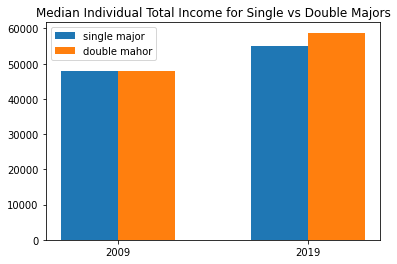

In [9]:
# doubele majors
ipsum_double_major = ipsum_college[ipsum_college["DEGFIELD2"] > 0]

# create data
years = [2009, 2019]
inctot_s = [np.median(ipsum_single_major[ipsum_single_major["YEAR"] == year]["INCTOT"]) 
            for year in years]
inctot_d = [np.median(ipsum_double_major[ipsum_double_major["YEAR"] == year]["INCTOT"]) 
            for year in years]
width = 0.3
  
# plot data in grouped manner of bar type
plt.bar(np.arange(len(years))-width/2, inctot_s, width, label="single major")
plt.bar(np.arange(len(years))+width/2, inctot_d, width, label="double mahor")
plt.xticks(np.arange(len(years)), years)
plt.title("Median Individual Total Income for Single vs Double Majors")
plt.legend()
plt.show()

It looks like there used to be no difference between individuals graduating from college with one major or two. But more recently, double major graduates seem to earn slightly higher than single major graduates. Still the difference is very modest (less than 7\%). 

In [10]:
ipsum_s = ipsum_single_major.drop(['DEGFIELD2', 'DEGFIELD2D'], axis=1)

In [11]:
# del ipsum_single_major, ipsum_double_major, ipsum_college

### What Are Those Majors?

Now we will replace all the code in `DEGFIELD` (majors) with texts. 

In [12]:
# replaces codes in column `col` in the dataframe `data` with 
# corresponding texts according to `ref` dictionary
def replace_code_w_text(data, col, ref):
    output = data.copy()
    output[col] = data[col].apply(lambda x: ref[x]).copy()
    return output

In [13]:
degfield = pd.read_csv("../data/degfield.txt", sep='\t').set_index("value").to_dict()["label"]
degfieldd = pd.read_csv("../data/degfieldd.txt", sep='\t').set_index("value").to_dict()["label"]
print(degfield)

{0: nan, 11: 'Agriculture', 13: 'Environment and Natural Resources', 14: 'Architecture', 15: 'Area, Ethnic, and Civilization Studies', 19: 'Communications', 20: 'Communication Technologies', 21: 'Computer and Information Sciences', 22: 'Cosmetology Services and Culinary Arts', 23: 'Education Administration and Teaching', 24: 'Engineering', 25: 'Engineering Technologies', 26: 'Linguistics and Foreign Languages', 29: 'Family and Consumer Sciences', 32: 'Law', 33: 'English Language, Literature, and Composition', 34: 'Liberal Arts and Humanities', 35: 'Library Science', 36: 'Biology and Life Sciences', 37: 'Mathematics and Statistics', 38: 'Military Technologies', 40: 'Interdisciplinary and Multi-Disciplinary Studies (General)', 41: 'Physical Fitness, Parks, Recreation, and Leisure', 48: 'Philosophy and Religious Studies', 49: 'Theology and Religious Vocations', 50: 'Physical Sciences', 51: 'Nuclear, Industrial Radiology, and Biological Technologies', 52: 'Psychology', 53: 'Criminal Justic

In [14]:
ipsum_s_text = ipsum_s.copy()
ipsum_s_text = replace_code_w_text(ipsum_s_text, "DEGFIELD", degfield)
ipsum_s_text = replace_code_w_text(ipsum_s_text, "DEGFIELDD", degfieldd)
ipsum_s_text

,YEAR,SCHOOL,EDUCD,DEGFIELD,DEGFIELDD,EMPSTAT,OCC,INCTOT,INCWAGE,INCWAGE_CPIU_2010
8,2009,1,101,Business,Human Resources and Personnel Management,1,540,66000,66000,67083.0
13,2009,1,101,Business,Business Management and Administration,1,420,40000,40000,40656.0
15,2009,1,101,Business,Finance,1,620,60000,60000,60984.0
16,2009,1,101,Computer and Information Sciences,Computer Science,1,1000,75000,75000,76230.0
23,2009,2,101,Business,Business Management and Administration,1,3850,1000,1000,1016.0
...,...,...,...,...,...,...,...,...,...,...
2548878,2019,1,101,Social Sciences,Economics,1,800,100000,100000,85292.0
2548883,2019,1,101,Education Administration and Teaching,Language and Drama Education,1,2310,52000,52000,44352.0
2548886,2019,1,114,"Area, Ethnic, and Civilization Studies","Area, Ethnic, and Civilization Studies",1,420,118000,118000,100645.0
2548889,2019,1,101,Environment and Natural Resources,Environmental Science,1,1970,130010,0,0.0


## Part 2: The Most Lucrative Major